# Exercise 6.2

In [2]:
import scipy
import scipy.linalg
import scipy.sparse.linalg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import ed

In [3]:
L = 14
g = 1.5
J = 1.
sx_list = ed.gen_sx_list(L)
sz_list = ed.gen_sz_list(L)
H = ed.gen_hamiltonian(sx_list, sz_list, g, J)
E, vecs = scipy.sparse.linalg.eigsh(H, which='SA')
psi0 = vecs[:, 0]
print(E[0])
assert psi0.shape == (2**L, )
print(np.inner(psi0.conj(), H*psi0))

-23.222959434117385
-23.2229594341174


In [4]:
psi_ab = np.reshape(psi0, (2**(L//2), 2**(L//2)))
U, S, V = scipy.linalg.svd(psi_ab, full_matrices=False)
print(S[:30])

[9.82136454e-01 1.88040844e-01 6.84502867e-03 1.31055615e-03
 2.31109540e-04 4.42484676e-05 5.72938356e-06 1.61072468e-06
 1.09695360e-06 3.08390986e-07 7.60258950e-08 3.99311059e-08
 1.45559952e-08 7.64525016e-09 1.34819880e-09 5.29864727e-10
 4.10310746e-10 2.58127498e-10 1.01448444e-10 7.85584780e-11
 1.78899156e-11 9.39628160e-12 3.42523208e-12 2.85968281e-12
 1.79902457e-12 5.71059785e-13 5.47521829e-13 4.43535255e-13
 1.24691232e-13 1.09339422e-13]


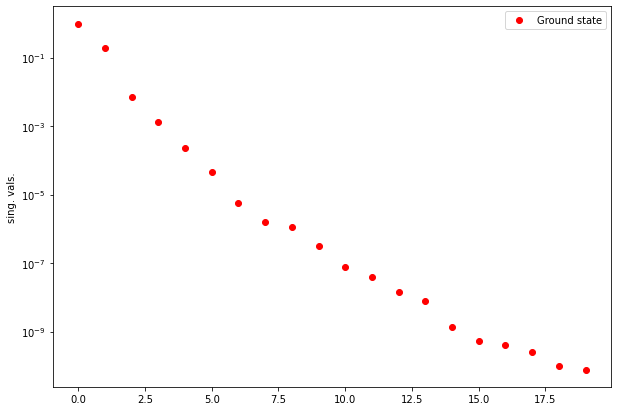

In [6]:
plt.figure(figsize=(10, 7))
plt.plot(S[:20], 'ro', label='Ground state')
plt.yscale('log')
plt.ylabel('sing. vals.')
plt.legend()
plt.show()

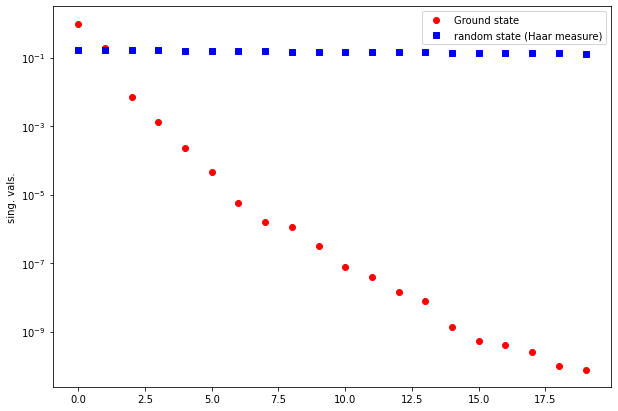

In [7]:
psi_rand = np.random.normal(size=psi0.shape) + 1.j * np.random.normal(size=psi0.shape)
psi_rand /= np.linalg.norm(psi_rand)
psi_rand_ab = np.reshape(psi_rand, (2**(L//2), 2**(L//2)))
_, S_rand, _ = scipy.linalg.svd(psi_rand_ab, full_matrices=False)
plt.figure(figsize=(10, 7))
plt.plot(S[:20], 'ro', label='Ground state')
plt.plot(S_rand[:20], 'bs', label='random state (Haar measure)')
plt.yscale('log')
plt.ylabel('sing. vals.')
plt.legend()
plt.show()

In [8]:
def entropy(S):
    S = np.asarray(S)
    S = S[S > 1.e-20] # useful if we have numerical rounding errors giving (small) negative S[alpha]
    # true since  x log(x) -> 0 for x -> 0.
    S2 = S*S
    return - np.sum(S2 * np.log(S2))

print(entropy(S))
print(entropy(S_rand))

0.1534421653865011
4.352114912754777


In [9]:
Ls = [6, 8, 10, 12, 14, 16]
entr_rand = []
entr_gs = dict((g, []) for g in [0.1, 0.5, 1., 1.5, 4.])
for L in Ls:
    sx_list = ed.gen_sx_list(L)
    sz_list = ed.gen_sz_list(L)
    for g in entr_gs:
        H = ed.gen_hamiltonian(sx_list, sz_list, g, J)
        E, vecs = scipy.sparse.linalg.eigsh(H, which='SA')
        psi0 = vecs[:, 0]
        psi0_ab = np.reshape(psi0, (2**(L//2), 2**(L//2)))
        _, S0, _ = scipy.linalg.svd(psi0_ab, full_matrices=False)
        entr_gs[g].append(entropy(S0))
    
    psi_rand = np.random.normal(size=psi0.shape) + 1.j * np.random.normal(size=psi0.shape)
    psi_rand /= np.linalg.norm(psi_rand)
    psi_rand_ab = np.reshape(psi_rand, (2**(L//2), 2**(L//2)))
    _, S_rand, _ = scipy.linalg.svd(psi_rand_ab, full_matrices=False)
    entr_rand.append(entropy(S_rand))
    

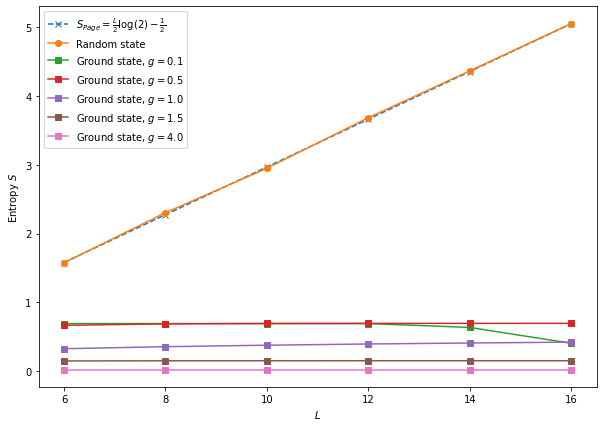

In [10]:
page_values = [l/2*np.log(2)-0.5 for l in Ls]

plt.figure(figsize=(10, 7))    
plt.plot(Ls, page_values,'--' ,marker='x', label=r"$S_{Page} = \frac{L}{2} \log(2) -\frac{1}{2}$")
plt.plot(Ls, entr_rand, marker='o', label='Random state')
for g in sorted(entr_gs):
    plt.plot(Ls, entr_gs[g], marker='s', label="Ground state, $g={g:.1f}$".format(g=g))
plt.xlabel('$L$')
plt.ylabel('Entropy $S$')
plt.legend()
plt.show()
    

## Conclusion

If we draw a random state from the Hilbertspace, we get a highly entangled state with a volume law, $ S \propto L$ in $1D$ (Page), where the Schmidt values are almost uniform.
In contrast, ground states of gapped systems satisfy an area law, which means $S \propto \mathrm{const}$.
Moreover, their Schmidt spectrum decays quickly (in the non-critical case roughly exponentially fast).
Hence, in two weeks, we will be able to represent ground states efficiently by a MPS with a small bond dimension (that does not need to increase with increasing $L$).
For critical (=gapless) systems, the area law is not strictly true, but there are $\log$ corrections. However, note that the entanglement is still small compared to random states with a volume law! Thus we still have a good chance to represent the state quite well with a MPS even for quite large $L$.


Deep in the paramegnetic phase (large $g$), the state is aligned along the field with only few fluctuations, hence a very small $S$.

In the symmetry broken phase, the entanglement is higher by $\approx \log(2)$, since for finite systems the exact ground state is a superposition of $|\rightarrow\rightarrow\rightarrow\rightarrow\rightarrow \dots\rangle$ and
 $|\leftarrow\leftarrow\leftarrow\leftarrow\leftarrow \dots\rangle$ (each with a few fluctuations for non-zero $g$). For larger $L$ (e.g. $L=16$) we see deviations from $\log 2$, these are of numerical nature because the gap cannot be resolved any longer.

## Comparison to periodic boundery conditions

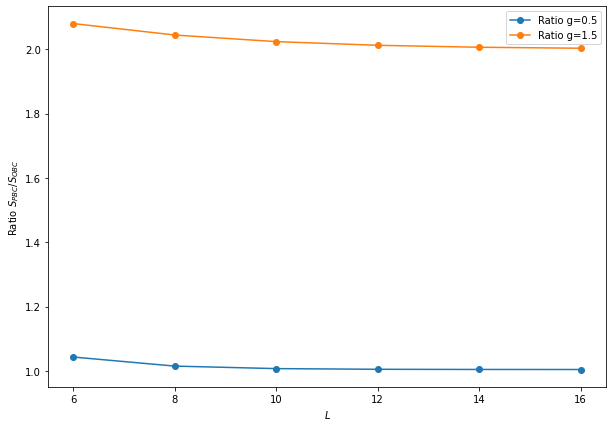

In [11]:
Ls = [6, 8, 10, 12, 14, 16]
gs = [0.5, 1.5]
entr_gs = {}
for g in gs:
    entr_gs[g] = []
    for L in Ls:
        sx_list = ed.gen_sx_list(L)
        sz_list = ed.gen_sz_list(L)
        hams = [ed.gen_hamiltonian(sx_list, sz_list, g, J),ed.gen_hamiltonian_periodic(sx_list, sz_list, g, J)]
        entr_bin = []
        for H in hams:
            E, vecs = scipy.sparse.linalg.eigsh(H, which='SA')
            psi0 = vecs[:, 0]
            psi0_ab = np.reshape(psi0, (2**(L//2), 2**(L//2)))
            _, S0, _ = scipy.linalg.svd(psi0_ab, full_matrices=False)
            entr_bin.append(entropy(S0))
        entr_gs[g].append(entr_bin)
    entr_gs[g] = np.array(entr_gs[g])
    
plt.figure(figsize=(10, 7))    
for g in gs:
    plt.plot(Ls, entr_gs[g][:,1]/entr_gs[g][:,0], marker='o', label="Ratio g={g:0.1f}".format(g=g))
plt.xlabel('$L$')
plt.ylabel('Ratio $S_{PBC}/S_{OBC}$')
plt.legend()
plt.show()


With PBC the entanglement entropy doubles with respect to OBC in the paramagnetic regime.
The cat states in the ferromagnetic phase are translation invariant anyway so here the boundery conditions do not matter, i.e. the ratio converges to 1 in the thermodynamic limit.